In [1]:
import scipy.io as spio
import numpy as np
import sys, os

import matplotlib.pyplot as plt
import math

In [2]:
def convert_data2org(cur_mat, maxV = 25.0):
    import numpy as np
    cur_mat = cur_mat * maxV;
    x = np.exp(cur_mat) - 1.0;

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)

    neg_idx = x < 0.0
    x[neg_idx] = 1e-8

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)
    
    return x

In [3]:
def plot_results(noisy, nn_output, clean, title=None):
    import numpy as np
    plt.figure(1, figsize=(20,20))
    #if title: plt.suptitle(title, fontsize=16)

    ax = plt.subplot(1, 3, 1)
    ax.set_title("noisy (1e5)")
#     ax.imshow(np.log10(noisy), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(noisy),  interpolation='none')
    
    
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Neural Nets")
#     ax.imshow(np.log10(nn_output), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(nn_output),  interpolation='none')
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("clean (1e8)")
#     ax.imshow(np.log10(clean), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(clean), interpolation='none')

    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.9, top=0.88, wspace=0.2, hspace=0.2)
    #plt.subplot_tool()
    plt.show()

### load NN results on 3D voxel images

In [4]:
nn_mat = spio.loadmat('./test_results/residual-homo-test1.mat', squeeze_me=True)
nn_mat = nn_mat['output_clean']

In [5]:
nn_mat.shape

(100, 100, 100)

In [ ]:
maxV = spio.loadmat('maxV.mat', squeeze_me=True)  # the output is a dict    
maxV = maxV['maxV']                                                         
print maxV 

25.0


### image by image comparison

 image 1



/home/users/leiming/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


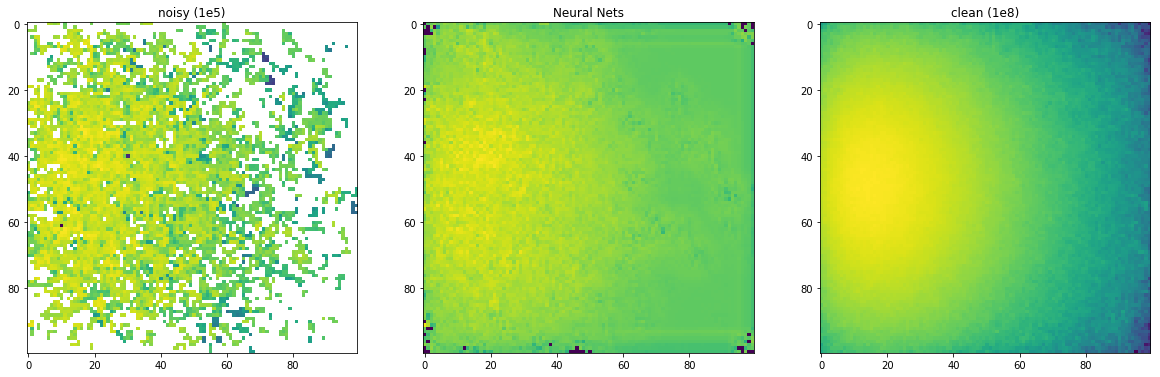

 image 2



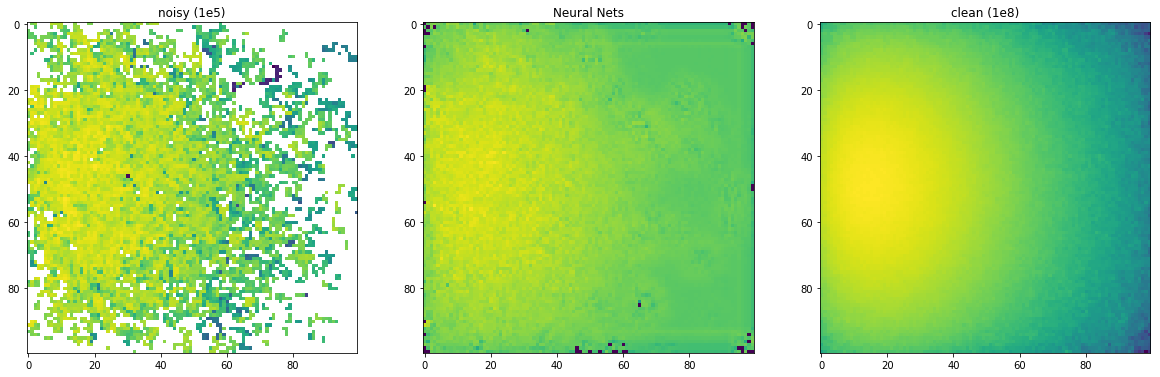

 image 3



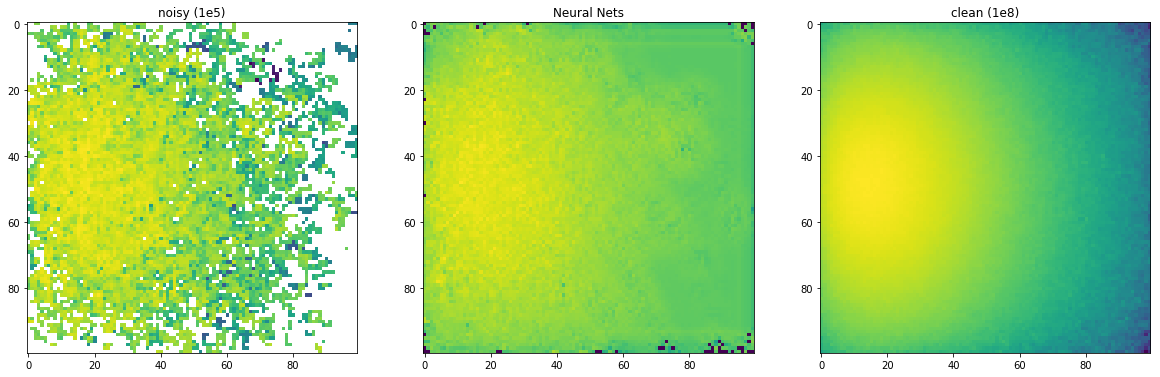

 image 4



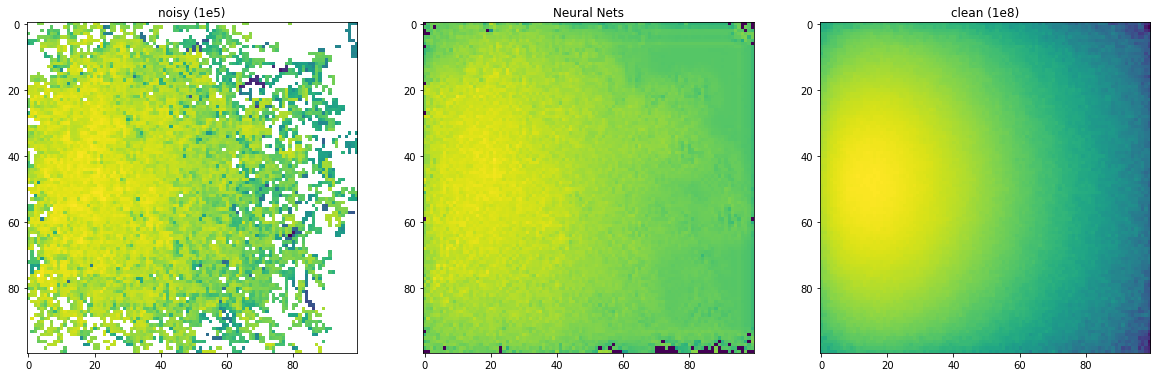

 image 5



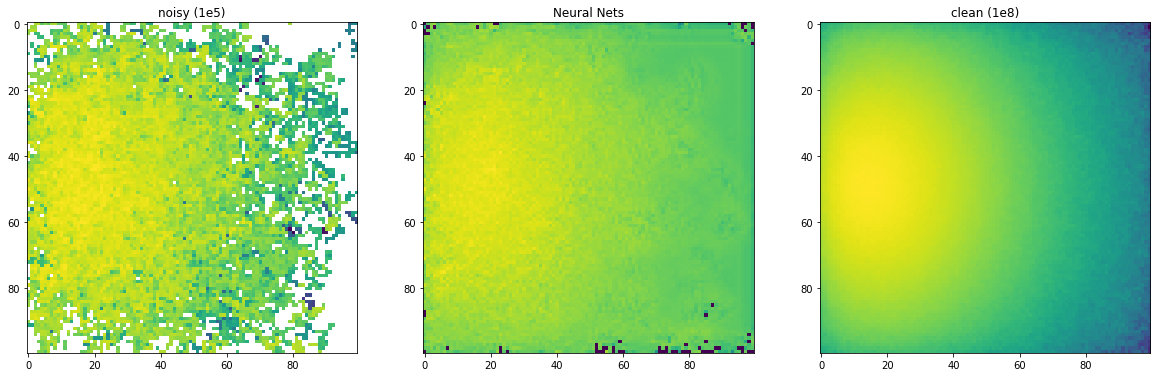

 image 6



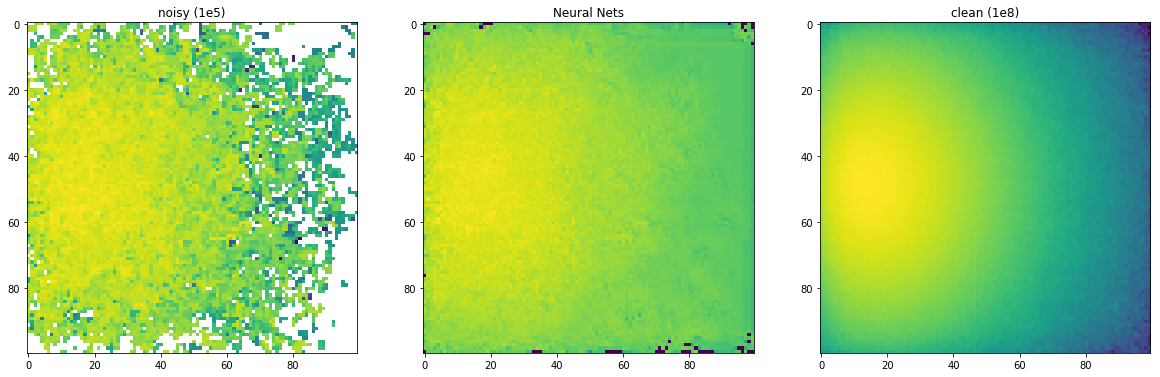

 image 7



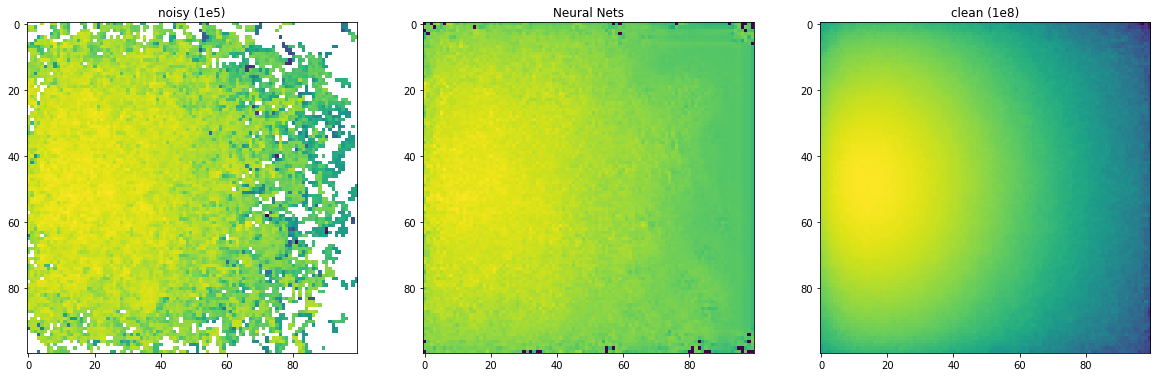

 image 8



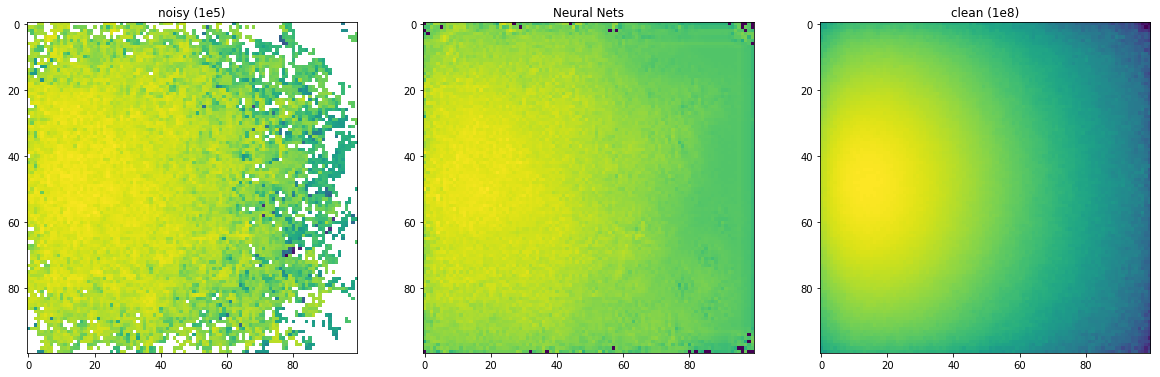

 image 9



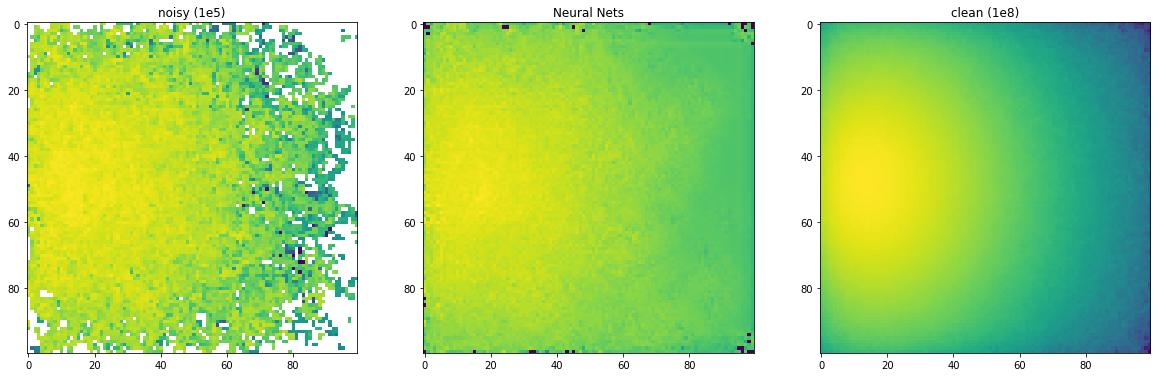

 image 10



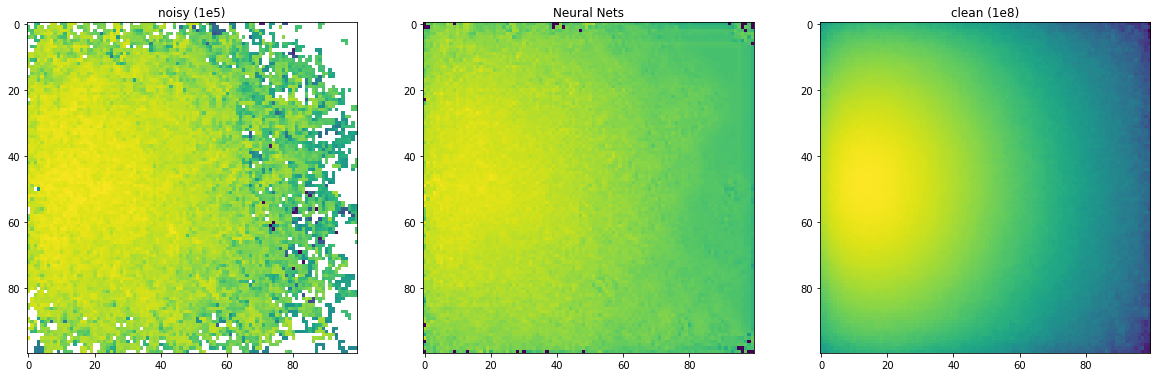

 image 11



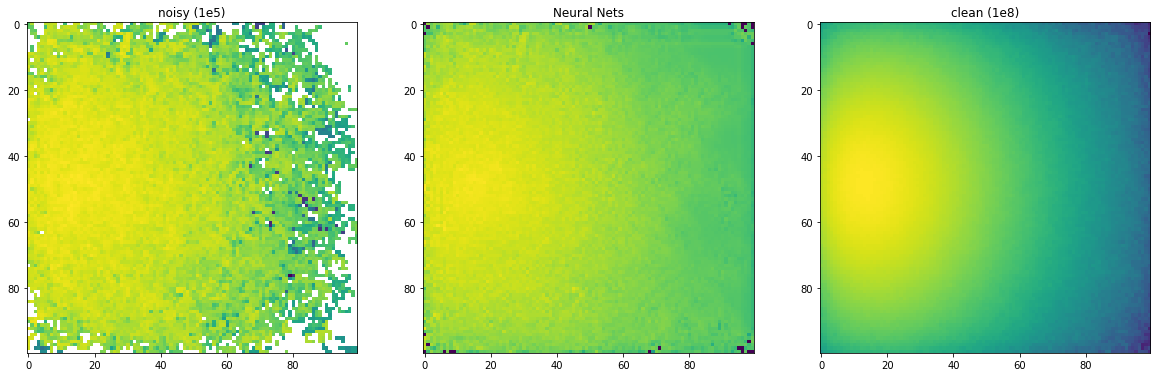

 image 12



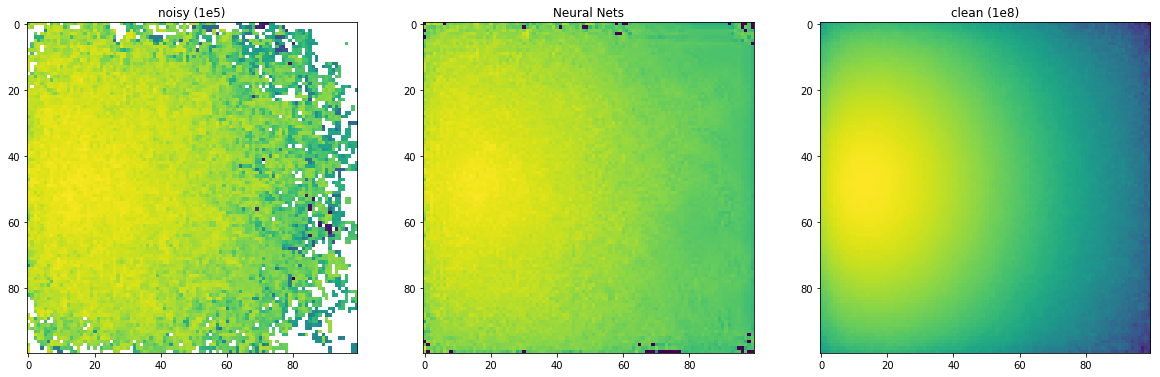

 image 13



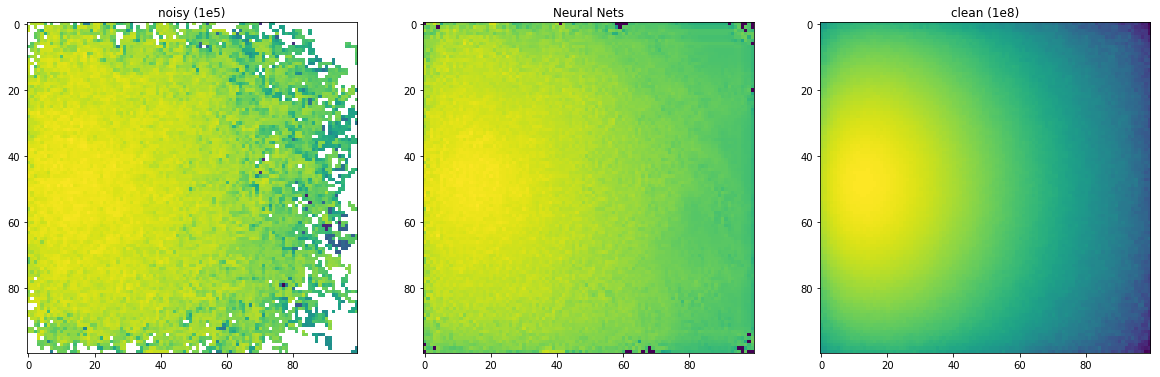

 image 14



In [ ]:
for i in xrange(1, 101):
    # =====================
    # load original image
    # =====================
    noisy1  = '../../data/osa/1e+05/1/y/osa_phn1e+05_test1_img[X].mat'      
    noisy1 = noisy1.replace('[X]', str(i))
    #print noisy1
    noisy_mat = spio.loadmat(noisy1, squeeze_me=True)
    noisy_mat = noisy_mat['currentImage']
    #print noisy_mat.shape
    
    
    clean1  = '../../data/osa/1e+08/1/y/osa_phn1e+08_test1_img[X].mat'      
    clean1 = clean1.replace('[X]', str(i))
    clean_mat = spio.loadmat(clean1, squeeze_me=True)
    clean_mat = clean_mat['currentImage']
    #print clean_mat.shape
    
    
    # =====================
    # load nn results
    # =====================
    nn_output = nn_mat[i-1, : , :]
    #print nn_output.shape
    
    # convert back to original scale
    nn_output = convert_data2org(nn_output, maxV = maxV)
    
    print " image %d\n"  % i
    
    
    
    plot_results(noisy_mat, nn_output, clean_mat, title='image-' + str(i))
    
    #break